# Importing Dependencies

In [1]:
# Manipulating csv file 
import numpy as np
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Waring filter 
import warnings
warnings.filterwarnings('ignore')

# Handel temporal data
from datetime import datetime,timedelta

In [2]:
#Loading dataset 
sales_data = pd.read_csv('train.csv')

In [3]:
print("Dataset Shape", sales_data.shape)
sales_data.head()

Dataset Shape (3000888, 6)


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
sales_data['store_nbr'].nunique()

54

In [5]:
sales_auto = sales_data[sales_data['family'] == 'AUTOMOTIVE'][['date','sales']]

In [6]:
sales_auto.shape

(90936, 2)

In [7]:
sales_auto.isnull().sum()

date     0
sales    0
dtype: int64

In [8]:
sales_auto = sales_auto.groupby('date')['sales'].sum().reset_index()

In [9]:
sales_auto['date'] = pd.to_datetime(sales_auto['date'])

In [10]:
# Finding the the time period of the data

print (f"The tabel contains data from {min(sales_auto.date)} to {max(sales_auto.date)} which is a total of {((max(sales_auto.date)- min(sales_auto.date)).days)+1} days")

The tabel contains data from 2013-01-01 00:00:00 to 2017-08-15 00:00:00 which is a total of 1688 days


In [11]:
sales_auto.head()

,date,sales
0,2013-01-01,0.0
1,2013-01-02,255.0
2,2013-01-03,161.0
3,2013-01-04,169.0
4,2013-01-05,342.0


In [12]:
sales_auto.set_index('date', inplace=True)

In [138]:
check = sales_auto.iloc[sales_auto.index.year <= 2016]

In [139]:
len(check)

1457

In [42]:
sales_2014 = sales_auto.iloc[sales_auto.index.year == 2014]

In [59]:
sales_2014.head()

,sales
date,
2014-01-01,4.0
2014-01-02,331.0
2014-01-03,299.0
2014-01-04,404.0
2014-01-05,393.0


# Dealing with missing values

In [119]:
# Generate the complete date range
full_dates = pd.date_range(start=sales_auto.index.min(), end=sales_auto.index.max(), freq='D')

# Find missing dates
missing_dates = full_dates.difference(sales_auto.index)
print("Missing dates:", missing_dates)

Missing dates: DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [123]:
len(sales_auto)

1688

In [122]:
len(full_dates)

1688

**Checking Data is stationary or not with sample year**

In [103]:
sales_auto.iloc[sales_auto.index.month == 12]

,sales
date,
2013-12-01,439.0
2013-12-02,278.0
2013-12-03,287.0
2013-12-04,230.0
2013-12-05,223.0
...,...
2016-12-27,436.0
2016-12-28,503.0
2016-12-29,448.0


<Axes: xlabel='date'>

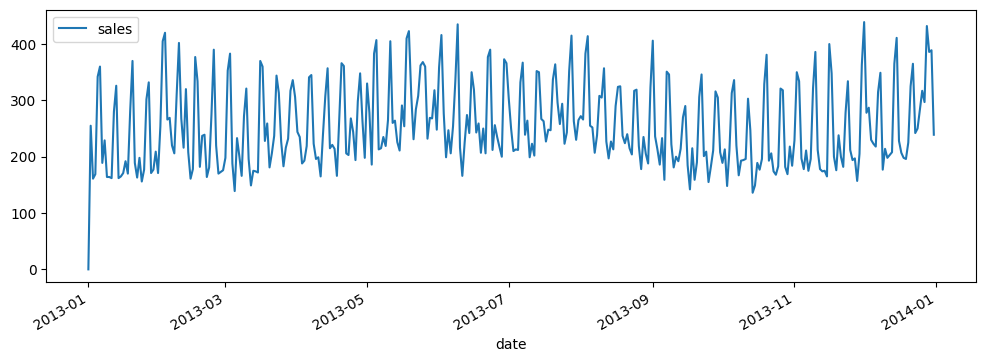

In [105]:
(sales_auto.iloc[sales_auto.index.year == 2013]).plot(figsize=(12,4))

The graph suggest that our data is stationary as the men and variance do not seem to fluctuate much. We wil be using ADF to confirm this suspicion

In [45]:
# Running the Augmented Dickey-Fuller (ADF) test to determine if our data is stationary
from statsmodels.tsa.stattools import adfuller

In [46]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [48]:
adf_test(sales_auto)

ADF Statistics: -3.2290887443448306
p- value: 0.018361456117775534
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**Our data is stationary**

In [49]:
sales_auto.index.min()

Timestamp('2013-01-01 00:00:00')

In [50]:
sales_auto.index.max()

Timestamp('2017-08-15 00:00:00')

# Auto Regressive Model

In [51]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

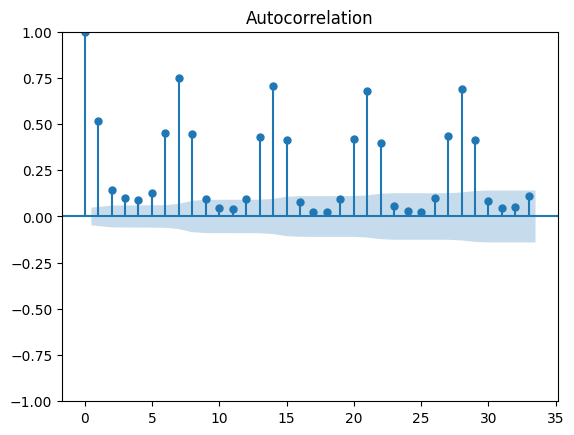

In [52]:
acf = plot_acf(sales_auto["sales"])

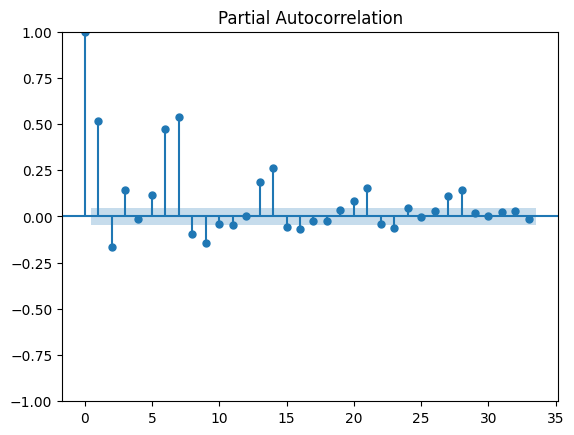

In [53]:
pacf12 = plot_pacf(sales_auto["sales"])

# Taking Train and test data

In [75]:
sales_auto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   1684 non-null   float64
dtypes: float64(1)
memory usage: 26.3 KB


In [76]:
# Determining split point for 80 202 train test split
split_point = int(len(sales_auto) * 0.8)
split_point

1347

In [77]:
train_data, test_data = sales_auto[:split_point], sales_auto[split_point:]
test_data

,sales
date,
2016-09-12,238.0
2016-09-13,234.0
2016-09-14,238.0
2016-09-15,163.0
2016-09-16,239.0
...,...
2017-08-11,441.0
2017-08-12,403.0
2017-08-13,481.0


# ARIMA Model

In [78]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
model_ARIMA = ARIMA(train_data['sales'],order =(5,1,2))

In [80]:
model_Arima_fit=model_ARIMA.fit()

In [81]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -7482.565
Date:                Sun, 26 May 2024   AIC                          14981.130
Time:                        13:38:36   BIC                          15022.769
Sample:                             0   HQIC                         14996.726
                               - 1347                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3578      0.023     15.510      0.000       0.313       0.403
ar.L2         -0.8042      0.023    -34.613      0.000      -0.850      -0.759
ar.L3         -0.1611      0.028     -5.700      0.000      -0.217      -0.106
ar.L4         -0.3945      0.023    -17.114      0.000      -0.440      -0.349
ar.L5         -0.4032      0.025    -16.160      0.000      -0.452      -0.354
ma.L1         -1.0898      0.018    -60.518      0.000      -1.125      -1.054
ma.L2          0.8172      0.016     50.710      0.000       0.786       0.849
sigma2      3998.9118     99.598     40.151      0.000    3803.704    4194.119
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):               776.69
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
#prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2016-09-12 00:00:00
2017-08-15 00:00:00


In [83]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [84]:
predict = model_Arima_fit.predict(start = start,end=end)
predict.index = test_data.index

pred_levels = pd.Series(predict, index=test_data.index)
pred_levels

test_data['predictions'] = pred_levels

date
2016-09-12    307.001699
2016-09-13    237.804142
2016-09-14    260.352807
2016-09-15    283.694504
2016-09-16    309.782460
                 ...    
2017-08-11    312.850732
2017-08-12    330.462974
2017-08-13    334.171925
2017-08-14    321.279177
2017-08-15    301.616227
Name: predicted_mean, Length: 337, dtype: float64

date
2016-09-12    307.001699
2016-09-13    237.804142
2016-09-14    260.352807
2016-09-15    283.694504
2016-09-16    309.782460
                 ...    
2017-08-11    312.850732
2017-08-12    330.462974
2017-08-13    334.171925
2017-08-14    321.279177
2017-08-15    301.616227
Name: predicted_mean, Length: 337, dtype: float64

<Axes: xlabel='date'>

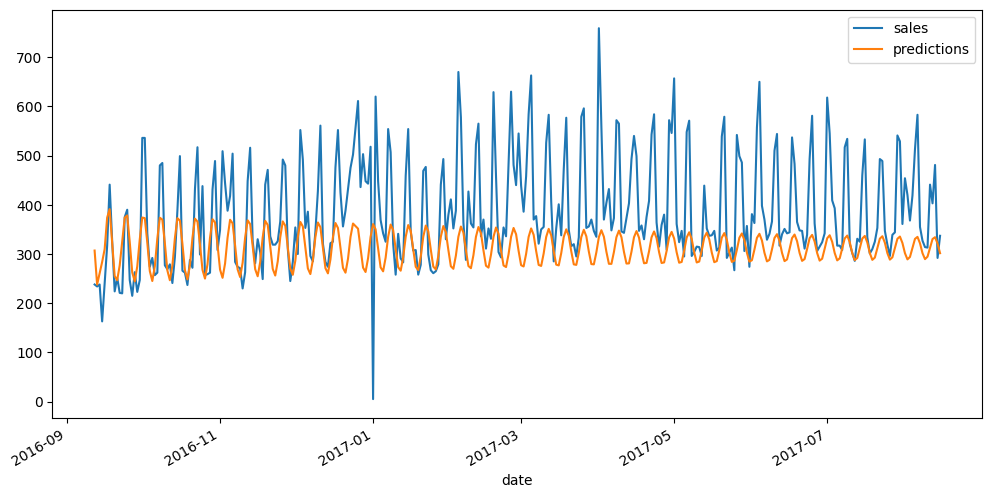

In [87]:
test_data[['sales','predictions']].plot(figsize=(12,6))

In [437]:
test_data

,sales,predictions
date,,
2016-09-12,238.0,378.755558
2016-09-13,234.0,351.872908
2016-09-14,238.0,353.726780
2016-09-15,163.0,353.543783
2016-09-16,239.0,353.505230
...,...,...
2017-08-11,441.0,340.570010
2017-08-12,403.0,340.538136
2017-08-13,481.0,340.506302


# Evaluation with MSE

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE", mean_absolute_error(test_data['sales'], test_data['predictions']))
print("MSE", mean_squared_error(test_data['sales'], test_data['predictions']))
print("RMSE", np.sqrt(mean_squared_error(test_data['sales'], test_data['predictions'])))
r2_bld = r2_score(test_data['sales'], test_data['predictions'])
print("R2 Score", r2_bld)

MAE 88.65053943235692
MSE 14375.435746964173
RMSE 119.89760525950538
R2 Score -0.2278927517377849


In [90]:
test_data['sales'].mean()

385.89020771513356

# Auto_arima to find best order

In [71]:
from pmdarima import auto_arima

In [72]:
stepwise_fit = auto_arima(sales_auto, trace=True, suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19656.695, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20498.690, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20478.758, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20085.286, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20496.696, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19747.724, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19700.497, Time=0.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19699.911, Time=1.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=19677.770, Time=2.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=19709.109, Time=1.86 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19696.960, Time=1.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=19536.441, Time=2.80 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=18980.725, Time=2.41 sec
 ARIMA(4,1,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1684
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -9448.537
Date:                Sun, 26 May 2024   AIC                          18913.073
Time:                        13:35:47   BIC                          18956.500
Sample:                             0   HQIC                         18929.158
                               - 1684                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3562      0.021     16.919      0.000       0.315       0.397
ar.L2         -0.7729      0.021    -36.873      0.000      -0.814      -0.732
ar.L3         -0.1882      0.025     -7.505      0.000      -0.237      -0.139
ar.L4         -0.3764      0.021    -18.324      0.000      -0.417      -0.336
ar.L5         -0.3946      0.023    -17.508      0.000      -0.439      -0.350
ma.L1         -1.1008      0.015    -71.996      0.000      -1.131      -1.071
ma.L2          0.8274      0.014     61.006      0.000       0.801       0.854
sigma2      4441.6274     78.433     56.630      0.000    4287.902    4595.353
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):              2802.77
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               2.15   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
import statsmodels.api as sm

In [108]:
serimax = sm.tsa.statespace.SARIMAX(train_data, order = (5,1,2))

In [110]:
model_serimax = serimax.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37374D+00    |proj g|=  9.55130D-01


 This problem is unconstrained.



At iterate    5    f=  5.78978D+00    |proj g|=  1.53109D-01

At iterate   10    f=  5.64389D+00    |proj g|=  1.72811D-01

At iterate   15    f=  5.59006D+00    |proj g|=  6.57193D-02

At iterate   20    f=  5.56848D+00    |proj g|=  6.36851D-02

At iterate   25    f=  5.56343D+00    |proj g|=  1.79263D-01

At iterate   30    f=  5.55855D+00    |proj g|=  1.16686D-01

At iterate   35    f=  5.55703D+00    |proj g|=  1.42372D-01

At iterate   40    f=  5.55610D+00    |proj g|=  1.05587D-02

At iterate   45    f=  5.55569D+00    |proj g|=  1.77520D-02

At iterate   50    f=  5.55499D+00    |proj g|=  1.55673D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [111]:
model_serimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1347
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -7482.565
Date:                Sun, 26 May 2024   AIC                          14981.130
Time:                        22:01:19   BIC                          15022.769
Sample:                             0   HQIC                         14996.726
                               - 1347                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3578      0.023     15.510      0.000       0.313       0.403
ar.L2         -0.8042      0.023    -34.613      0.000      -0.850      -0.759
ar.L3         -0.1611      0.028     -5.700      0.000      -0.217      -0.106
ar.L4         -0.3945      0.023    -17.114      0.000      -0.440      -0.349
ar.L5         -0.4032      0.025    -16.160      0.000      -0.452      -0.354
ma.L1         -1.0898      0.018    -60.518      0.000      -1.125      -1.054
ma.L2          0.8172      0.016     50.710      0.000       0.786       0.849
sigma2      3998.9118     99.598     40.151      0.000    3803.704    4194.119
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):               776.69
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
predict = model_serimax.predict(start = start,end=end)
predict.index = test_data.index

pred_levels = pd.Series(predict, index=test_data.index)
pred_levels

test_data['predictions'] = pred_levels
test_data.head()

,sales,predictions
date,,
2016-09-12,238.0,307.001699
2016-09-13,234.0,237.804142
2016-09-14,238.0,260.352807
2016-09-15,163.0,283.694504
2016-09-16,239.0,309.782460


<Axes: xlabel='date'>

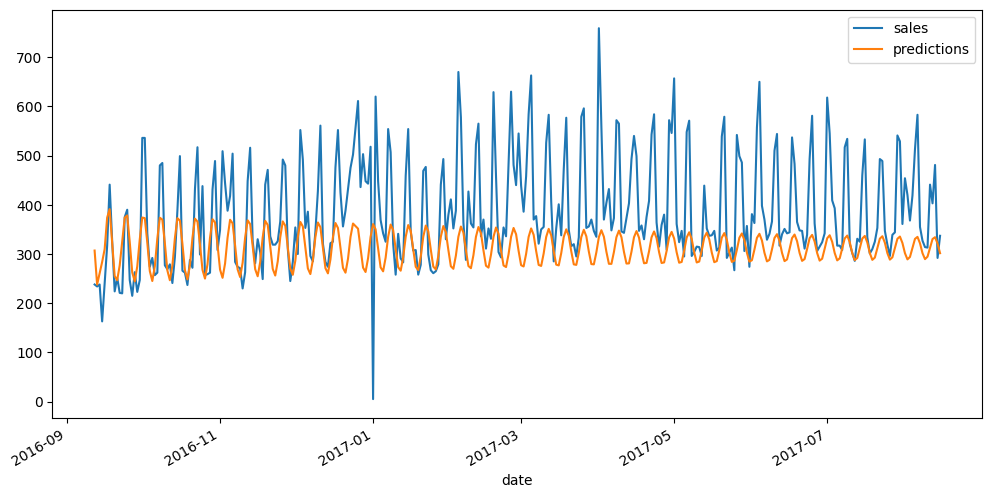

In [114]:
test_data[['sales','predictions']].plot(figsize=(12,6))

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sales_auto['sales'], model='additive')


ValueError: This function does not handle missing values

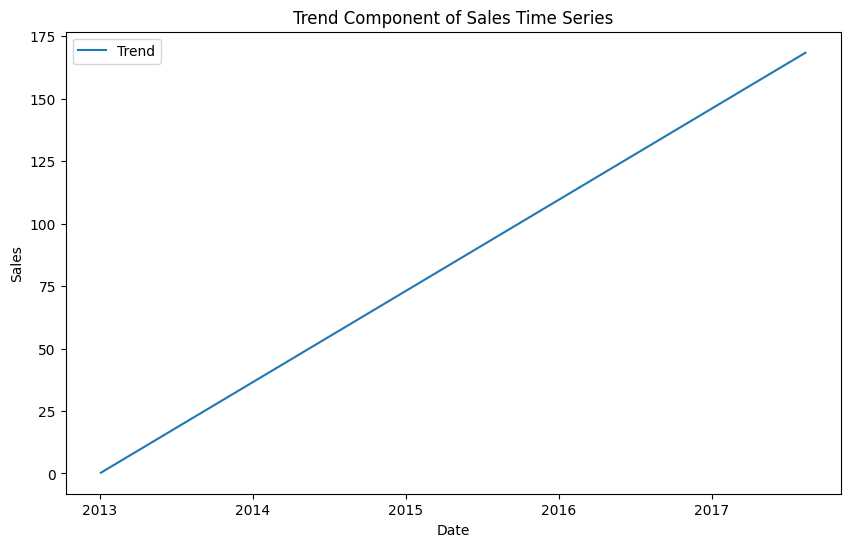

In [115]:
import pandas as pd

import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration
dates = pd.date_range(start='2013-01-01', end='2017-08-15', freq='D')
sales = [i * 0.1 for i in range(len(dates))]  # Example sales data
df = pd.DataFrame({'sales': sales}, index=dates)

# Ensure the index is a DatetimeIndex and set the frequency
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')

# Perform seasonal decomposition
result = seasonal_decompose(df['sales'], model='additive')

# Extract the trend component
trend = result.trend

# Plot the trend component
plt.figure(figsize=(10, 6))
plt.plot(df.index, trend, label='Trend')
plt.title('Trend Component of Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
